# Data Understanding

In [1]:
# Here are all the imports needed for this phase

# Data wrangling
import pandas as pd
import matplotlib.pyplot as plt

# Data visualization
import seaborn as sns

## Dataset identity card

We only use one csv file given by an anonymous company. Its size on the disk is a bit less than 1 Mb.

In [2]:
conversion_df = pd.read_csv("conversion_data.csv")

In [3]:
conversion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [4]:
conversion_df.head(10)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0
8,UK,29,0,Direct,4,0
9,US,25,0,Ads,2,0


The dataset contains 316 200 samples and a small number of features. Let's review quickly these 6 variables : 
- __country__ where the user of the website connected from
- __age__ of the user
- __new_user__ is a dichotomic variable, its value is 0 if the user has ever came into the website, 1 if it is the first time
- __source__ represents the path followed by the user so that he could visit the website
    - Ads stands for Advertisement
    - Seo for Search Engine Optimization
    - Direct if the user directly entered the URL address of the website
- __total_pages_visited__ is the number of pages visited by the user
- __converted__ is the target variable, its value is 0 if the user came out without buying something, 1 if he actually bought an article/service

## Field description

In [5]:
conversion_df.describe(include='all')

,country,age,new_user,source,total_pages_visited,converted
count,316200,316200.000000,316200.000000,316200,316200.000000,316200.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,178092,NaN,NaN,155040,NaN,NaN
mean,NaN,30.569858,0.685465,NaN,4.872966,0.032258
std,NaN,8.271802,0.464331,NaN,3.341104,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


We are in presence of two numerical variables, __age__ and __total_pages_visited__, which values are integers. The data seem to be correct except one record corresponding to the 123 years old user, which may be asbsurd.
Moreover, there are four qualitative features in the dataset, all non-ordinal even if the variables __new_user__ and __converted__ are numerically coded.
Lastly, there are no missing values.

## Distribution of target variable

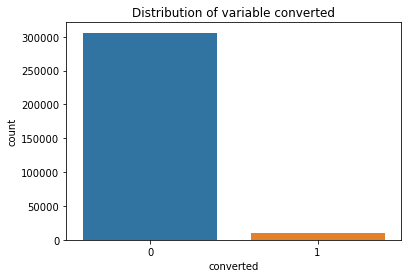

In [6]:
sns.countplot(data=conversion_df, x="converted")
plt.title("Distribution of variable converted")
plt.show()

In [7]:
conversion_df["converted"].value_counts()/conversion_df.shape[0]

0    0.967742
1    0.032258
Name: converted, dtype: float64

In [8]:
conversion_df[conversion_df["converted"] == 1].shape

(10200, 6)

As we can see, the rate of people who converted, ie purchased something and came out, is around 3%. This is clearly a case of unbalanced data. To settle this, in the Data Preparation phase, we are going to undersample our dataset in order to prevent the results being distorted by this problem.